# Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import mysql.connector

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Creating connection to the database SQL

In [2]:
# Creating connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='SenhaMySQL2024',
    database='dataproject')

cursor = connection.cursor()

In [3]:
# Querying the datas
query = 'SELECT * FROM pizza_sales_data;'

cursor.execute(query)
result = cursor.fetchall()  

# columns = [i[0] for i in cursor.description], get the name of the columns
df = pd.DataFrame(result, columns = [i[0] for i in cursor.description])
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Day of the Week': 'Day'}, inplace=True)
display(df)

,id,Date,Client ID,Phone Number,Category,Pizza Name,Size,Unit Price,Quantity,Total Price,Ingredients,Day
0,1,2015-01-01,601,55048920805021,Chicken,The Chicken Pesto Pizza,M,16.75,5.0,83.75,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",Thursday
1,2,2015-01-01,1060,55048965368982,Classic,The Greek Pizza,S,12.00,5.0,60.00,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Thursday
2,3,2015-01-01,470,55048979620977,Classic,The Hawaiian Pizza,M,13.25,5.0,66.25,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday
3,4,2015-01-01,1862,55048996697585,Veggie,The Green Garden Pizza,S,12.00,5.0,60.00,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",Thursday
4,5,2015-01-01,804,55048947870966,Supreme,The Prosciutto and Arugula Pizza,L,20.75,5.0,103.75,"Prosciutto di San Daniele, Arugula, Mozzarella...",Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,2015-12-24,1743,55048913026955,Veggie,The Four Cheese Pizza,L,17.95,5.0,89.75,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",Thursday
48616,48617,2015-12-24,524,55048959004703,Veggie,The Vegetables + Vegetables Pizza,M,16.00,5.0,80.00,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",Thursday
48617,48618,2015-12-24,273,55048946259879,Veggie,The Mexicana Pizza,L,20.25,5.0,101.25,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday
48618,48619,2015-12-24,981,55048961407928,Supreme,The Sicilian Pizza,M,16.25,5.0,81.25,"Coarse Sicilian Salami, Tomatoes, Green Olives...",Thursday


In [4]:
# Closing connection
cursor.close()
connection.close()

# Importing DataFrame and organizing the data

In [5]:
display(df['Day'])

# Transforming sizes into numerical referener for correlation analysis
mapeamento = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['Day'] = df['Day'].map(mapeamento)
display(df['Day'])

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
48615    Thursday
48616    Thursday
48617    Thursday
48618    Thursday
48619    Thursday
Name: Day, Length: 48620, dtype: object

0        4
1        4
2        4
3        4
4        4
        ..
48615    4
48616    4
48617    4
48618    4
48619    4
Name: Day, Length: 48620, dtype: int64

# Sourche for correlation with a color graph

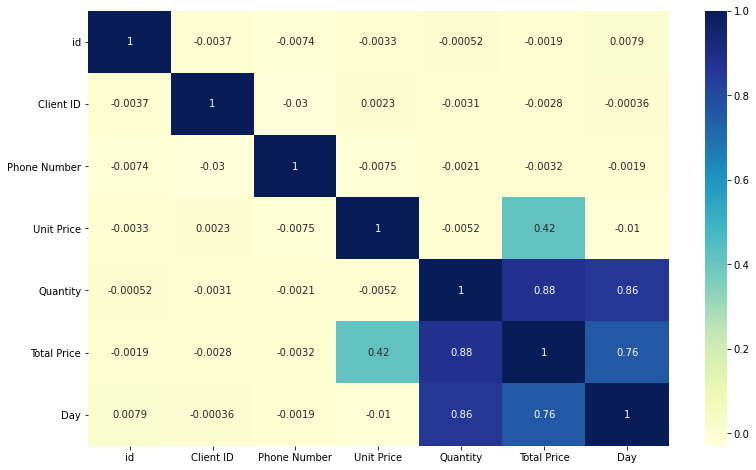

In [6]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

.

# Preparing the data

In [7]:
# Grouping Sales by Day
data1 = df.groupby([df['Date'].dt.to_period("D").astype(str), 'Day'])['Quantity'].sum().reset_index()
data1.tail()

,Date,Day,Quantity
353,2015-12-27,7,712.0
354,2015-12-28,1,204.0
355,2015-12-29,2,240.0
356,2015-12-30,3,410.0
357,2015-12-31,4,890.0


In [8]:
# Converting the date column to datetime
data1['Date'] = pd.to_datetime(data1['Date'])
data1.corr()

,Day,Quantity
Day,1.000000,0.771153
Quantity,0.771153,1.000000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      358 non-null    datetime64[ns]
 1   Day       358 non-null    int64         
 2   Quantity  358 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.5 KB


In [10]:
# Selects the X input variable
X = np.array(data1[['Day']])
type(X)

# Selects the target variable
y = data1['Quantity']

In [11]:
# Divide datas
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Model with LinearRegression

In [12]:
# Instantiating
modelo_regressao = LinearRegression()

# Fitting the model
modelo_regressao.fit(X_treino,y_treino)

# Using the model to predict test data
y_regressao = modelo_regressao.predict(X_teste)

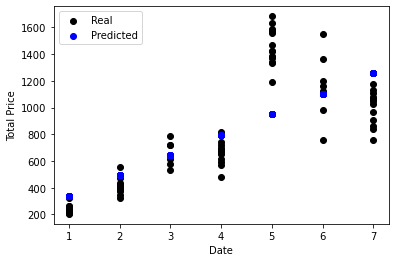

In [13]:
X_teste_df = pd.DataFrame(X_teste, columns=['Day'])  # Converte X_teste de volta para DataFrame

# Visualizing the predictions
plt.scatter(X_teste_df['Day'], y_teste, color='black', label='Real')
plt.scatter(X_teste_df['Day'], y_regressao, color='blue', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

In [14]:
# Evaluating the model
# Mean squared error
mean_squared = mean_squared_error(y_teste, y_regressao)
print(f'Mean Squared Error: {mean_squared}')

# Calculating R²
r2 = r2_score(y_teste, y_regressao)
print(f'R²: {r2}')

Mean Squared Error: 77579.19658469326
R²: 0.5621579061575688


# Create Model with DecisionTreeRegressor

In [15]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiating the Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Fitting the model
decision_tree_model.fit(X_treino, y_treino)

# Using the model to predict test data
y_decision_tree = decision_tree_model.predict(X_teste)

## Evaluating the errors
# Mean squared error
error_squared_decision_tree = mean_squared_error(y_teste, y_decision_tree)
print(error_squared_decision_tree)

# R-squared
r2_decision_tree = r2_score(y_teste, y_decision_tree)
print(r2_decision_tree)


16290.275093749215
0.908060814363684


# Compare

In [16]:
print('Linear Regression')
print('Mean Squared Error: ' + str(round(mean_squared, 2)))
print('R-squared: ' + str(round(r2, 4)))
print('-----------------------------------------')
print('Decision Tree')
print('Mean Squared Error: ' + str(round(error_squared_decision_tree, 2)))
print('R-squared: ' + str(round(r2_decision_tree, 4)))

Linear Regression
Mean Squared Error: 77579.2
R-squared: 0.5622
-----------------------------------------
Decision Tree
Mean Squared Error: 16290.28
R-squared: 0.9081


# Using the Models

In [17]:
# Define datas
# {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Testing for Wednesday
X_new_data = np.array([[3]])
X_new_data = X_new_data.reshape(-1, 1)

In [18]:
# Using the Linear Regression model to predict new data
y_pred_linear_regression = modelo_regressao.predict(X_new_data)

# Printing the predictions
print('Linear Regression Predictions - The total value sold will be', y_pred_linear_regression)

Linear Regression Predictions - The total value sold will be [645.23802074]


In [19]:
# Using the Decision Tree model to predict new data
y_pred_decision_tree = decision_tree_model.predict(X_new_data)

# Printing the predictions
print('Decision Tree Predictions - The total value sold will be:', y_pred_decision_tree)

Decision Tree Predictions - The total value sold will be: [681.30434783]
